The packages we used are listed here:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### read in the datasets

In [2]:
colors=pd.read_csv('colors.csv')
set_parts = pd.read_csv('set_part.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')
parts = pd.read_csv('parts.csv')
part_categories = pd.read_csv('part_categories.csv')

# Exploratory Data Analysis

### Sets & Themes

This file contains information on LEGO sets, including a unique ID number, the name of the set, the year it was released, its theme and how many parts it includes.

In this subsection, we explored:

* how does number of sets change over year?

* how does number of themes change over year?

* how many sets does one theme have on average?

In [13]:
sets.head()

,set_id,set_name,year,theme_id
0,00-1,Weetabix Castle,1970,414
1,0011-2,Town Mini-Figures,1978,84
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199
3,0012-1,Space Mini-Figures,1979,143
4,0013-1,Space Mini-Figures,1979,143


In [17]:
len((sets['set_id'].unique())

SyntaxError: unexpected EOF while parsing (<ipython-input-17-d97fab733afc>, line 1)

In [7]:
sets.nunique()

set_id      11673
set_name    10370
year           66
theme_id      575
dtype: int64

In [4]:
themes.nunique()

theme_id           614
theme_name         402
theme_parent_id     78
dtype: int64

Over the years, the number of sets and themes increase rapidly.

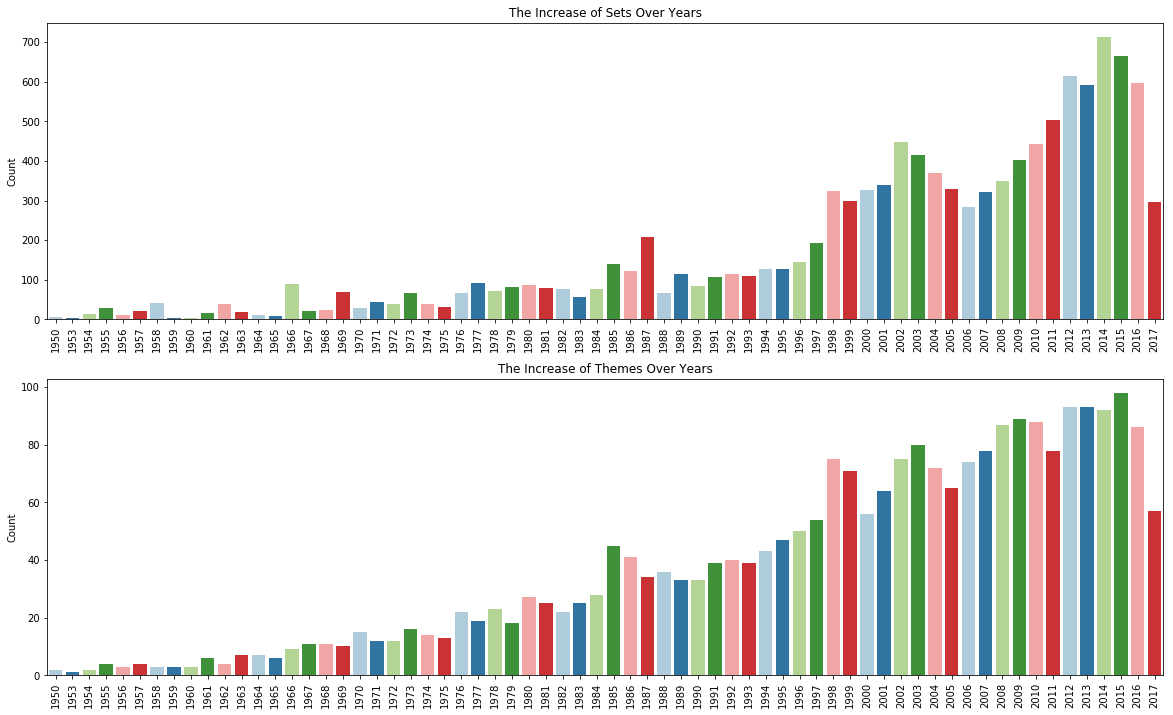

In [5]:
fig, axes = plt.subplots(2, 1, figsize=[20, 12])
temp = sets.groupby('year')['set_id'].count()
sns.barplot(temp.index.values, temp.values, palette=sns.color_palette("Paired"), ax=axes[0])
axes[0].set_title('The Increase of Sets Over Years')
axes[0].set_ylabel('Count')
plt.sca(axes[0])
plt.xticks(rotation=90)
temp = sets.groupby('year')['theme_id'].nunique()
sns.barplot(temp.index.values, temp.values, palette=sns.color_palette("Paired"), ax=axes[1])
axes[1].set_title('The Increase of Themes Over Years')
axes[1].set_ylabel('Count')
plt.sca(axes[1])
plt.xticks(rotation=90)
plt.show()

In [6]:
set_parts_1 = set_parts.merge(sets, left_on='set_id', right_on='set_id').merge(themes, left_on='theme_id', right_on='theme_id')

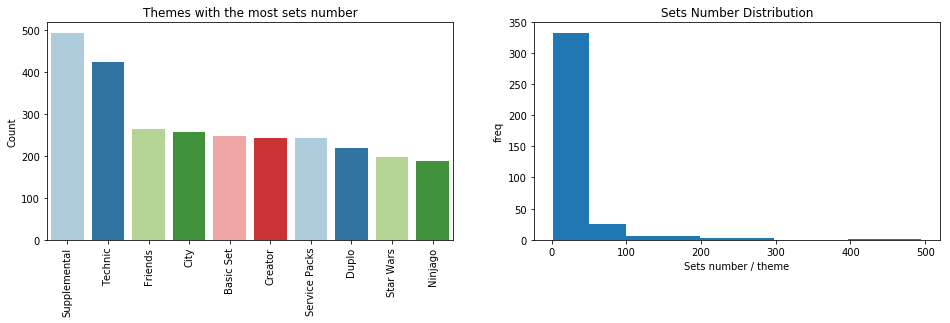

In [7]:
# how many sets does one theme have on average?
fig, axes = plt.subplots(1, 2, figsize=[16, 4])
temp =set_parts_1.groupby('theme_name')['set_id'].nunique()
sns.barplot(temp.sort_values(ascending=False).index.values[:10], temp.sort_values(ascending=False).values[:10], palette=sns.color_palette("Paired"), ax=axes[0])
axes[0].set_title('Themes with the most sets number')
axes[0].set_ylabel('Count')
plt.sca(axes[0])
plt.xticks(rotation=90)
axes[1].hist(temp)
axes[1].set_title('Sets Number Distribution')
axes[1].set_ylabel('freq')
axes[1].set_xlabel('Sets number / theme')
plt.show()

### Sets & Parts

* how many parts does one set have?

* Does there exist common part, which is used across many sets? 

* Which part categories will be used across many sets?


In [9]:
set_parts_2 = set_parts.merge(sets, left_on='set_id', right_on='set_id')

In [10]:
set_parts_2.columns

Index(['set_id', 'part_id', 'quantity', 'set_name', 'year', 'theme_id'], dtype='object')

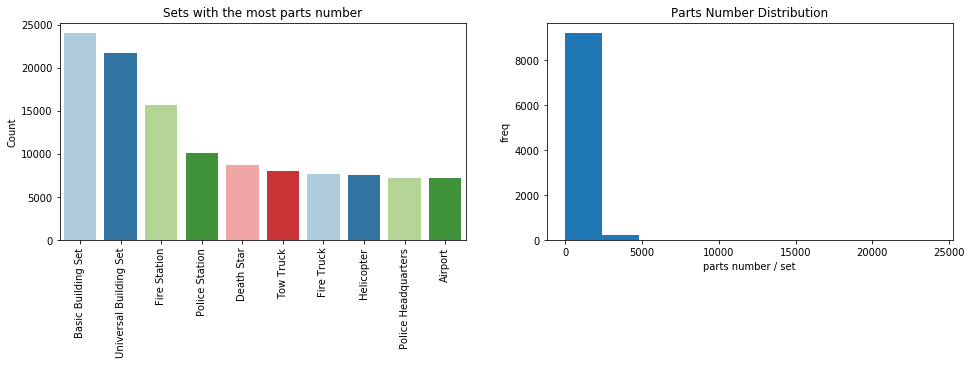

In [11]:
# How many parts does one set has
fig, axes = plt.subplots(1, 2, figsize=[16, 4])
temp =set_parts_2.groupby('set_name')['quantity'].sum()
sns.barplot(temp.sort_values(ascending=False).index.values[:10], temp.sort_values(ascending=False).values[:10], palette=sns.color_palette("Paired"), ax=axes[0])
axes[0].set_title('Sets with the most parts number')
axes[0].set_ylabel('Count')
plt.sca(axes[0])
plt.xticks(rotation=90)
axes[1].hist(temp)
axes[1].set_title('Parts Number Distribution')
axes[1].set_ylabel('freq')
axes[1].set_xlabel('parts number / set')
plt.show()

The majority of the parts can be used across the sets.

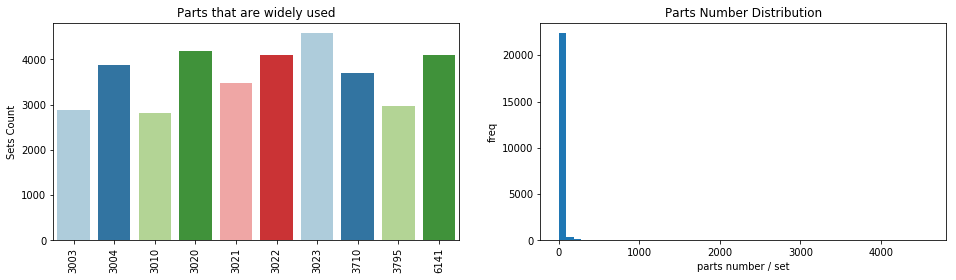

In [12]:
fig, axes = plt.subplots(1, 2, figsize=[16, 4])
temp = set_parts_2.groupby('part_id')['set_id'].nunique().sort_values(ascending=False)
sns.barplot(temp.sort_values(ascending=False).index.values[:10], temp.sort_values(ascending=False).values[:10], palette=sns.color_palette("Paired"), ax=axes[0])
axes[0].set_title('Parts that are widely used')
axes[0].set_ylabel('Sets Count')
plt.sca(axes[0])
plt.xticks(rotation=90)
axes[1].hist(temp, bins=50)
axes[1].set_title('Parts Number Distribution')
axes[1].set_ylabel('freq')
axes[1].set_xlabel('parts number / set')
plt.show()

We can also look at the part categories to see which categories are widely used across sets.

In [13]:
set_parts_3 = set_parts_1.merge(parts, left_on='part_id', right_on='part_id').merge(part_categories, left_on='part_cat_id', right_on='part_cat_id')

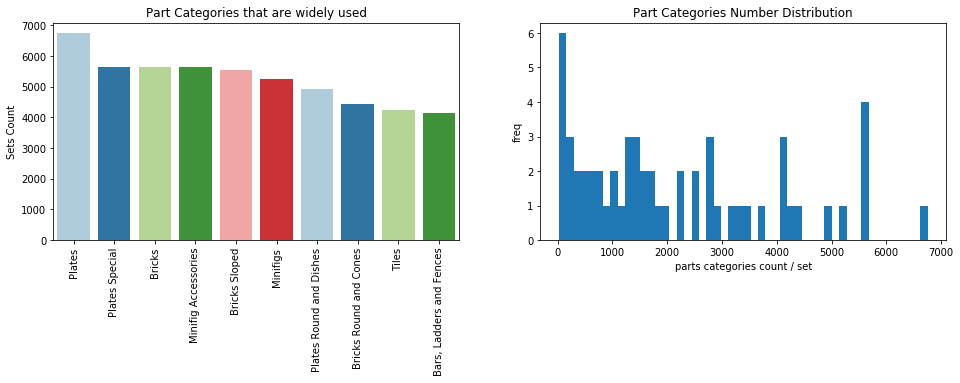

In [14]:
fig, axes = plt.subplots(1, 2, figsize=[16, 4])
temp = set_parts_3.groupby('part_cat_name')['set_id'].nunique().sort_values(ascending=False)
sns.barplot(temp.sort_values(ascending=False).index.values[:10], temp.sort_values(ascending=False).values[:10], palette=sns.color_palette("Paired"), ax=axes[0])
axes[0].set_title('Part Categories that are widely used')
axes[0].set_ylabel('Sets Count')
plt.sca(axes[0])
plt.xticks(rotation=90)
axes[1].hist(temp, bins=50)
axes[1].set_title('Part Categories Number Distribution')
axes[1].set_ylabel('freq')
axes[1].set_xlabel('parts categories count / set')
plt.show()

### Themes & Colors

In this subsection, we explored:

* how does number of colors change over year?

* how does color associated with top 5 themes? 



In [15]:
set_part_color=set_parts_1.merge(parts, left_on='part_id', right_on='part_id').merge(colors, left_on='color_id', right_on='color_id')

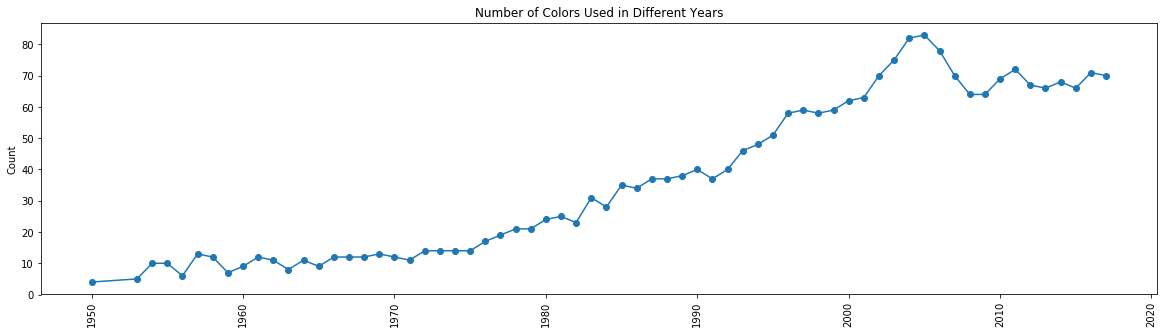

In [16]:
fig, axes = plt.subplots(figsize=[20, 5])
temp = set_part_color.groupby('year')['color_rgb'].nunique()
plt.scatter(temp.index.values, temp.values)
plt.plot(temp.index.values, temp.values)
axes.set_title('Number of Colors Used in Different Years')
axes.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

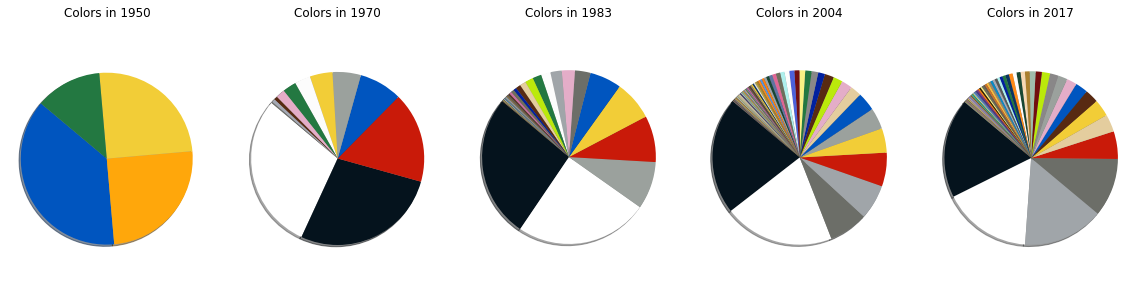

In [17]:
fig, axes = plt.subplots(1, 5, figsize=[20, 5])
years = [1950, 1970, 1983, 2004, 2017]
for year in range(5): 
    mask = set_part_color['year'] == years[year]
    temp = set_part_color[mask]['color_rgb']
    sizes = set_part_color[mask]['color_rgb'].value_counts().values
    colors = [ "#"+x for x in set_part_color[mask]['color_rgb'].value_counts().index]
    # Plot
    axes[year].pie(sizes, colors=colors,
        shadow=True, startangle=140)
    axes[year].set_title('Colors in {}'.format(years[year]))
    axes[year].axis('equal')

Next, we want to see how the color associted with the most popular themes in 2017. Thus, we first find out the top five themes.

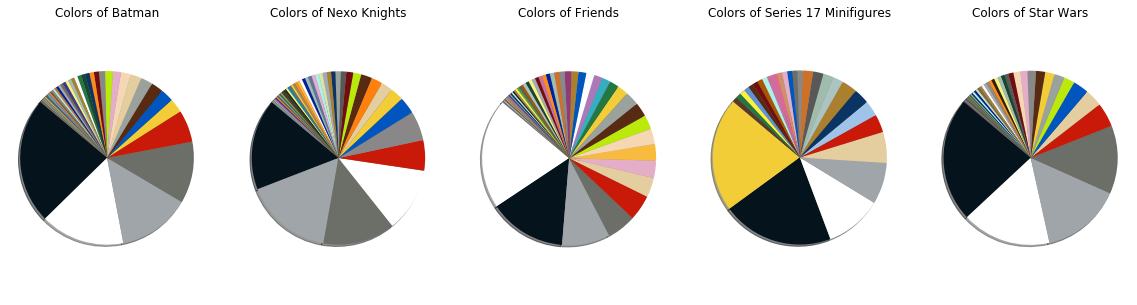

In [18]:
fig, axes = plt.subplots(1, 5, figsize=[20, 5])
mask = set_part_color['year'] == 2017
themes_list = set_part_color[mask].groupby('theme_name')['set_id'].nunique().sort_values(ascending=False)[:5].index.values
for i in range(5): 
    mask = set_part_color['theme_name'] == themes_list[i]
    temp = set_part_color[mask]['color_rgb']
    sizes = set_part_color[mask]['color_rgb'].value_counts().values
    colors = [ "#"+x for x in set_part_color[mask]['color_rgb'].value_counts().index]
    # Plot
    axes[i].pie(sizes, colors=colors,
        shadow=True, startangle=140)
    axes[i].set_title('Colors of {}'.format(themes_list[i]))
    axes[i].axis('equal')